In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

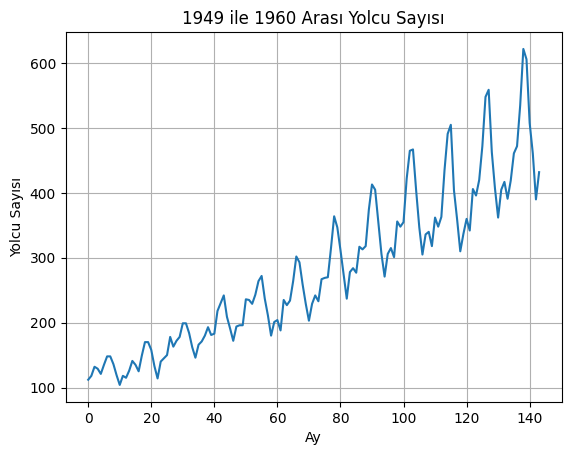

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, usecols=['Passengers'])

plt.plot(df)
plt.title("1949 ile 1960 Arası Yolcu Sayısı")
plt.xlabel("Ay")
plt.ylabel("Yolcu Sayısı")
plt.grid()
plt.show()

data = df.values.astype("float32")#veriyi array e dönüştürüp data değişkenine atıyoruz
#Verileri okuyup grafik haline getiriyoruz

In [3]:
scaler = MinMaxScaler()# Verileri 0 1 ler şeklinde düzenliyoruz
data_scaled = scaler.fit_transform(data)
#Veriyi normalleştiriyoruz

In [4]:
def create_dataset(dataset, time_step=12):#Giriş çıkış oluşturuyoruz
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i+time_step])
        y.append(dataset[i+time_step])
    return np.array(X), np.array(y)

time_step = 12
X, y = create_dataset(data_scaled, time_step)

# LSTM girişi için üç boyutlu hale getirilir veriler
X = X.reshape(X.shape[0], X.shape[1], 1)


In [5]:
model = Sequential() #her katman, bir önceki katmandan gelen veriyi alır ve işlem yapar sequential fonksiyonunda
model.add(LSTM(50, return_sequences=False, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')#Modeli eğitmek için Adam optimizasyon algoritması ve MSE kayıp fonksiyonunu kullanıyoruz

model.fit(X, y, epochs=100, batch_size=16, verbose=1)#veriyi küçük parçalara ayırıp öyle öğreniyor


C:\Users\Elif\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1370
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0166 
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0163 
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0101 
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117 
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0107 
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0089 
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0105 
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0085 
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0107 
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0084 
Epoch 15/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0093 
Epoch 16/100
9/9 ━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


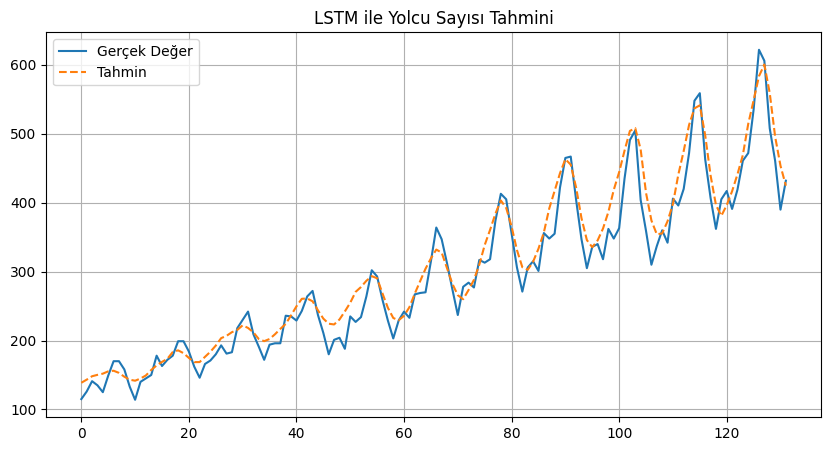

In [6]:
predictions = model.predict(X)
predicted = scaler.inverse_transform(predictions)
original = scaler.inverse_transform(y.reshape(-1, 1))
#Tahmin yapılıyor


# grafik üzerinde gerçek değerler ile tahmin arasındaki fark gösteriliyor
plt.figure(figsize=(10,5))
plt.plot(original, label="Gerçek Değer")
plt.plot(predicted, label="Tahmin", linestyle='--')
plt.legend()
plt.title("LSTM ile Yolcu Sayısı Tahmini")
plt.grid()
plt.show()
